In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
from geographiclib.geodesic import Geodesic

In [2]:
catalog_dir = "/uufs/chpc.utah.edu/common/home/koper-group3/alysha/ben_catalogs/20230103"
ys_ev_df = pd.read_csv(f"{catalog_dir}/yellowstone_events_20121001_20230103.csv")
ys_arr_df = pd.read_csv(f'{catalog_dir}/yellowstone_arrivals_20121001_20230103.csv')
ml_df = pd.read_csv(f"{catalog_dir}/earthquakeLocalMagnitudeCatalog.csv")
holt_amps = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/ynp_local_magnitude_recalibration/catalogs/amplitudes/yellowstone.amps.clean.csv')

In [3]:
ml_df[['subsource','amp_rflag']].value_counts()

subsource  amp_rflag
Jiggle     F            67912
           H            58808
RT2        A             1536
Name: count, dtype: int64

In [51]:
def filter_and_merge_ys_events():
    pass

def add_channel_prefix(df):
    df["Cmp"] = df["seedchan"].str[:-1]

def get_event_feature_info(column_name):
    pass

def merge_channel_rows(station_column_rows):
    pass

def filter_and_merge_stations():
    pass

# Filter amplitude values to yellowstone events, merge the event information

In [52]:
ys_ev_df.head()

,evid,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
0,60000005,44.743333,-111.067500,5.48,1.349112e+09,-0.20,d,F,2012-10-01 17:26:54.360001+00:00
1,60000010,44.438167,-111.032000,6.05,1.349101e+09,0.35,d,F,2012-10-01 14:24:40.459999+00:00
2,60000050,44.276000,-110.645667,2.18,1.350621e+09,1.15,d,F,2012-10-19 04:29:58.239998+00:00
3,60000060,44.346167,-110.327333,9.44,1.350808e+09,1.34,d,F,2012-10-21 08:32:33.660000+00:00
4,60000065,44.395000,-111.021833,4.71,1.350274e+09,0.82,d,F,2012-10-15 04:14:30.209999+00:00


In [4]:
n_ys_amps = ml_df[ml_df['evid'].isin(ys_ev_df['evid'])].shape[0]
print(f"There are {n_ys_amps} amplitudes for Yellowstone events out of {ml_df.shape[0]} total amplitudes")

There are 49283 amplitudes for Yellowstone events out of 128256 total amplitudes


In [5]:
# Filter amps to just ys
ml_df = ml_df.merge(ys_ev_df, on='evid', how='inner')
assert ml_df.shape[0] == n_ys_amps

# Add a column for the channel prefix, for merging

In [6]:
ml_df["Cmp"] = ml_df["seedchan"].str[:-1]

# Remove some of the unnecessary columns. Rename remaining to match/be more similar to the style of Holt (2022) data

In [7]:
ml_df = ml_df[['evid', 'sta', 'net', 'seedchan', 'location', 'magtype', 'amplitude', 'units', 'mag',
       'magres', 'magcorr', 'subsource', 'period', 'snr', 'event_lat',
       'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'utc', 'Cmp']]

In [8]:
ml_df.columns = ['Evid', 'Sta', 'Net', 'Chan', 'Loc', 'SMagType', 'Amp', 'Un', 'SML',
       'SMLRes', 'Corr', 'Source', 'Per', 'Snr', 'EqLat',
       'EqLon', 'EqDep', 'EqOt', 'CatMag',
       'CatMagType', 'Date', 'Cmp']

In [11]:
ml_stat_counts = (ml_df[ml_df['CatMagType'] == 'l']['Sta'].value_counts()//2).reset_index()

In [12]:
ml_stat_counts

,Sta,count
0,YNR,6176
1,YMR,5951
2,YFT,3523
3,YHB,3099
4,YUF,2042
5,LKWY,1723
6,BOZ,821
7,AHID,170
8,HLID,126
9,BW06,105


In [9]:
ml_df[ml_df['Evid'] == 60408292]

,Evid,Sta,Net,Chan,Loc,SMagType,Amp,Un,SML,SMLRes,...,Per,Snr,EqLat,EqLon,EqDep,EqOt,CatMag,CatMagType,Date,Cmp
37487,60408292,YDD,WY,HHN,01,l,0.315392,cm,1.57,0.26,...,0.18,25.122896,44.324833,-110.537167,5.59,1.599315e+09,1.31,l,2020-09-05 14:13:15.040000+00:00,HH
37488,60408292,YDD,WY,HHE,01,l,0.151407,cm,1.57,0.26,...,0.12,17.893585,44.324833,-110.537167,5.59,1.599315e+09,1.31,l,2020-09-05 14:13:15.040000+00:00,HH
37489,60408292,LKWY,US,BH1,00,l,0.011932,cm,1.06,-0.25,...,0.15,3.281011,44.324833,-110.537167,5.59,1.599315e+09,1.31,l,2020-09-05 14:13:15.040000+00:00,BH
37490,60408292,LKWY,US,BH2,00,l,0.019847,cm,1.06,-0.25,...,0.30,3.461973,44.324833,-110.537167,5.59,1.599315e+09,1.31,l,2020-09-05 14:13:15.040000+00:00,BH


# Filter to stations with corrections in Holt (2022) method and add the station location information in to the dataframe

In [60]:
# Holt (2022) has 20 stations with corrections - but stations can have multiple sensors
holt_stats = holt_amps.drop_duplicates(['Sta', 'Cmp'])[['Sta', 'Cmp', 'SLat', 'SLon', 'SElev']].sort_values("Sta").reset_index(drop=True)
print(f"There are {holt_stats.shape[0]} unique station/sensor pairs in Holt (2022) catalog")
holt_stats

There are 27 unique station/sensor pairs in Holt (2022) catalog


,Sta,Cmp,SLat,SLon,SElev
0,AHID,BH,42.765400,-111.10040,1.960
1,BOZ,BH,45.596970,-111.62967,1.589
2,BUT,EL,46.010834,-112.55666,1.758
3,BW06,BH,42.766700,-109.55830,2.224
4,LKWY,BH,44.565200,-110.40000,2.424
5,LOHW,BH,43.612400,-110.60380,2.121
6,REDW,BH,43.362400,-110.85180,2.192
7,YEE,HH,44.485300,-109.89690,2.270
8,YFT,HH,44.451330,-110.83583,2.292
9,YHB,HH,44.750800,-111.19620,2.167


In [61]:
# Stations with multiple sensors - all the locations look to be the same in their catalog
holt_stats[holt_stats.duplicated('Sta', keep=False)]

,Sta,Cmp,SLat,SLon,SElev
10,YHH,HH,44.78833,-110.85050,2.717
11,YHH,EN,44.78833,-110.85050,2.717
12,YHL,EN,44.85090,-111.18300,2.691
13,YHL,HH,44.85090,-111.18300,2.691
16,YMR,EN,44.66867,-110.96500,2.149
17,YMR,HH,44.66867,-110.96500,2.149
19,YNR,HH,44.71550,-110.67917,2.336
20,YNR,EN,44.71550,-110.67917,2.336
21,YPP,HH,44.27100,-110.80450,2.707
22,YPP,EN,44.27100,-110.80450,2.707


In [62]:
# Drop duplicate station/location information
holt_stats = holt_stats.drop_duplicates(['Sta', 'SLat', 'SLon', 'SElev']).drop('Cmp', axis=1)
print(f'There are {holt_stats.shape[0]} unique station/location in the Holt (2022) catalog')
assert holt_stats.shape[0] == 20, 'The number of unique stations is not what was expected'
holt_stats

There are 20 unique station/location in the Holt (2022) catalog


,Sta,SLat,SLon,SElev
0,AHID,42.765400,-111.10040,1.960
1,BOZ,45.596970,-111.62967,1.589
2,BUT,46.010834,-112.55666,1.758
3,BW06,42.766700,-109.55830,2.224
4,LKWY,44.565200,-110.40000,2.424
5,LOHW,43.612400,-110.60380,2.121
6,REDW,43.362400,-110.85180,2.192
7,YEE,44.485300,-109.89690,2.270
8,YFT,44.451330,-110.83583,2.292
9,YHB,44.750800,-111.19620,2.167


In [63]:
print(f"There are {ml_stat_counts[~ml_stat_counts['Sta'].isin(holt_stats['Sta'])]['count'].sum()} station amplitude values that are being removed from local mag events")

There are 361 station amplitude values that are being removed from local mag events


In [64]:
print(f"There are originally {ml_df.shape[0]} amplitude values and {ml_df[ml_df['CatMagType'] == 'l'].shape[0]} Ml amp values")

There are originally 49283 amplitude values and 47951 Ml amp values


In [65]:
n_matching_stat_amps = ml_df[ml_df['Sta'].isin(holt_stats['Sta'].unique())].shape[0]
assert ml_df.shape[0] == n_matching_stat_amps + ml_df[~ml_df['Sta'].isin(holt_stats['Sta'].unique())].shape[0], 'Station filter did not work correctly'
print(n_matching_stat_amps)

48535


In [66]:
ml_df = ml_df.merge(holt_stats, on=['Sta'], how='inner').sort_values('Evid')
assert ml_df.shape[0] == n_matching_stat_amps, "The new df size is not what was expected when filtered by Holt (2022) stations"
ml_df.head()

,Evid,Sta,Net,Chan,Loc,SMagType,Amp,Un,SML,SMLRes,...,EqLon,EqDep,EqOt,CatMag,CatMagType,Date,Cmp,SLat,SLon,SElev
3510,60000620,YFT,WY,HHE,01,l,0.163640,cm,1.94,-0.25,...,-110.552667,4.43,1.357546e+09,2.19,l,2013-01-07 08:12:32.649998+00:00,HH,44.45133,-110.83583,2.292
10706,60000620,YUF,WY,HHN,01,l,0.408221,cm,2.78,0.59,...,-110.552667,4.43,1.357546e+09,2.19,l,2013-01-07 08:12:32.649998+00:00,HH,44.71260,-110.51170,2.394
3511,60000620,YFT,WY,HHN,01,l,0.115313,cm,1.94,-0.25,...,-110.552667,4.43,1.357546e+09,2.19,l,2013-01-07 08:12:32.649998+00:00,HH,44.45133,-110.83583,2.292
39714,60000620,YHB,WY,HHN,01,l,0.021834,cm,2.00,-0.19,...,-110.552667,4.43,1.357546e+09,2.19,l,2013-01-07 08:12:32.649998+00:00,HH,44.75080,-111.19620,2.167
27508,60000620,YMR,WY,HHN,01,l,0.108468,cm,1.73,-0.46,...,-110.552667,4.43,1.357546e+09,2.19,l,2013-01-07 08:12:32.649998+00:00,HH,44.66867,-110.96500,2.149


In [67]:
print(f"There are now {ml_df.shape[0]} amplitude values and {ml_df[ml_df['CatMagType'] == 'l'].shape[0]} Ml amp values")

There are now 48535 amplitude values and 47229 Ml amp values


# Merge E and N channel information for the same event/station into the same row

Do not merge on subsource or SML. Subsource may be different as the amplitudes may not have been repicked in Jiggle for one of the components. SML may be different for the two components if using magnitude types other than ML, there were 476 amplitude measurements from 37 events that all had RT2 picks and the SML for the same station different channel were different. Must not average amplitudes to compute station ML if not opened in Jiggle. I did check, and SMLRes is the same for both components though... 

Example of event with mismatch subsources: 60037042

37 Events:
60019557, 60028117, 60028457, 60028512, 60032417, 60032442,
60037602, 60069602, 60070242, 60070257, 60081427, 60099327,
60119552, 60132312, 60216777, 60219557, 60222232, 60304132,
60315152, 60407952, 60414962, 60429692, 60436382, 60437602,
60438447, 60439932, 60445462, 60445817, 60445832, 60446597,
60446637, 60447517, 60447777, 60448517, 60450197, 60522287,
60527262

In [68]:
# There seems to only be one event/station channel pair that do not both have picks, so should only have one row with Nan values
n_nans = ml_df.drop_duplicates(['Evid', 'Sta', 'Cmp'], keep=False).shape[0]
ml_df.drop_duplicates(['Evid', 'Sta', 'Cmp'], keep=False)


,Evid,Sta,Net,Chan,Loc,SMagType,Amp,Un,SML,SMLRes,...,EqLon,EqDep,EqOt,CatMag,CatMagType,Date,Cmp,SLat,SLon,SElev
42496,60079757,YHB,WY,HHE,01,l,0.199756,cm,1.83,0.01,...,-111.062667,11.61,1.407357e+09,1.82,l,2014-08-06 20:34:05.840000+00:00,HH,44.7508,-111.1962,2.167


In [69]:
ml_df['Chan'].unique()

array(['HHE', 'HHN', 'BHN', 'BHE', 'ENN', 'ENE', 'BH2', 'BH1'],
      dtype=object)

In [70]:
 # Get the information that is the same for different components of the same station for the same event
ml_df_reform = ml_df[['Evid','Sta', 'Cmp']].drop_duplicates().copy()

In [71]:
# Add in the East comp information
ml_df_reformE = ml_df_reform.merge(ml_df[ml_df['Chan'].str[-1].isin(['E', '1'])], on=['Evid','Sta', 'Cmp'], how='left')

In [72]:
# Add in the North comp information and add the appropriate suffix for the E/N columns
# ml_df_reformEN = ml_df_reformE.merge(ml_df[ml_df['Chan'].str[-1].isin(['N', '2'])], on=['Evid','Net', 'Sta', 'Loc', 'Cmp','Date', 'EqLat','EqLon', 'EqDep', 
#                       'EqOt', 'CatMag','CatMagType', 'SLon', 'SLat', 'SElev', 'SML', 'SMagType','SMLRes', 'Corr'], how='left', suffixes=('E', 'N'))

ml_df_reformEN = ml_df_reformE.merge(ml_df[ml_df['Chan'].str[-1].isin(['N', '2'])], on=['Evid','Net', 'Sta', 'Loc', 'Cmp','Date', 'EqLat','EqLon', 'EqDep', 
                       'EqOt', 'CatMag','CatMagType', 'SLon', 'SLat', 'SElev', 'SMLRes', 'Corr'], how='left', suffixes=('E', 'N'))

In [73]:
print(len(ml_df_reform), len(ml_df_reformE), len(ml_df_reformEN))

24268 24268 24268


In [74]:
assert ml_df_reformEN[~np.isnan(ml_df_reformEN['AmpE'])].shape[0] + ml_df_reformEN[~np.isnan(ml_df_reformEN['AmpN'])].shape[0] == ml_df.shape[0], "The number of amplitude values in the reformated df is incorrect"

In [75]:
assert ml_df_reformEN[(np.isnan(ml_df_reformEN['AmpE'])) | (np.isnan(ml_df_reformEN['AmpN']))].shape[0] == n_nans
ml_df_reformEN[(np.isnan(ml_df_reformEN['AmpE'])) | (np.isnan(ml_df_reformEN['AmpN']))]

,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,SLon,SElev,ChanN,SMagTypeN,AmpN,UnN,SMLN,SourceN,PerN,SnrN
7748,60079757,YHB,HH,WY,HHE,01,l,0.199756,cm,1.83,...,-111.1962,2.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Visually check that there are only 4 rows for this event... If the merge was done on the subsource, there will be > 4 rows. 
ml_df_reformEN[(ml_df_reformEN['Evid'] == 60037042)]

,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,SLon,SElev,ChanN,SMagTypeN,AmpN,UnN,SMLN,SourceN,PerN,SnrN
3157,60037042,LKWY,BH,US,BHE,01,l,0.390000,mm,1.50,...,-110.40000,2.424,BHN,l,0.168400,mm,1.50,RT2,NaN,0.000000
3158,60037042,YMR,HH,WY,HHE,01,l,1.280000,mm,1.01,...,-110.96500,2.149,HHN,l,0.120379,cm,1.01,Jiggle,0.54,22.943659
3159,60037042,YNR,HH,WY,HHE,01,l,0.033354,cm,1.26,...,-110.67917,2.336,HHN,l,0.031680,cm,1.26,Jiggle,0.48,14.144795
3160,60037042,YHB,HH,WY,HHE,01,l,0.009429,cm,1.18,...,-111.19620,2.167,HHN,l,0.107400,mm,1.18,RT2,NaN,0.000000


In [77]:
ml_df_reformEN.columns

Index(['Evid', 'Sta', 'Cmp', 'Net', 'ChanE', 'Loc', 'SMagTypeE', 'AmpE', 'UnE',
       'SMLE', 'SMLRes', 'Corr', 'SourceE', 'PerE', 'SnrE', 'EqLat', 'EqLon',
       'EqDep', 'EqOt', 'CatMag', 'CatMagType', 'Date', 'SLat', 'SLon',
       'SElev', 'ChanN', 'SMagTypeN', 'AmpN', 'UnN', 'SMLN', 'SourceN', 'PerN',
       'SnrN'],
      dtype='object')

In [78]:
# The amps with different SML values between comps
ml_df_reformEN[abs(ml_df_reformEN['SMLE'] - ml_df_reformEN['SMLN'] ) > 0]

,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,SLon,SElev,ChanN,SMagTypeN,AmpN,UnN,SMLN,SourceN,PerN,SnrN
1454,60019557,YHL,HH,WY,HHE,01,l,0.1328,mm,1.62,...,-111.1830,2.691,HHN,l,0.1297,mm,1.61,RT2,NaN,0.0
1455,60019557,YHH,HH,WY,HHE,01,l,0.2254,mm,1.75,...,-110.8505,2.717,HHN,l,0.2290,mm,1.76,RT2,NaN,0.0
1456,60019557,YMP,HH,WY,HHE,01,l,0.2240,mm,1.85,...,-110.1560,2.774,HHN,l,0.2510,mm,1.90,RT2,NaN,0.0
1457,60019557,YUF,HH,WY,HHE,01,l,0.6050,mm,1.98,...,-110.5117,2.394,HHN,l,0.8820,mm,2.14,RT2,NaN,0.0
1458,60019557,YUF,EN,WY,ENE,01,l,0.6350,mm,2.00,...,-110.5117,2.394,ENN,l,0.8470,mm,2.13,RT2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24226,60527262,YMR,HH,WY,HHE,01,l,1.1480,mm,1.88,...,-110.9650,2.149,HHN,l,0.7980,mm,1.72,RT2,NaN,0.0
24227,60527262,YHB,HH,WY,HHE,01,l,0.1695,mm,1.91,...,-111.1962,2.167,HHN,l,0.2680,mm,2.11,RT2,NaN,0.0
24228,60527262,YPP,HH,WY,HHE,01,l,0.1995,mm,1.60,...,-110.8045,2.707,HHN,l,0.2119,mm,1.63,RT2,NaN,0.0
24229,60527262,YMP,HH,WY,HHE,01,l,0.6370,mm,1.40,...,-110.1560,2.774,HHN,l,0.5700,mm,1.35,RT2,NaN,0.0


# Convert from cm to mm

In [79]:
for en in ['E','N']:
    ml_df_reformEN.loc[ml_df_reformEN[f"Un{en}"] == "cm", f"Amp{en}"] *= 10
    ml_df_reformEN.loc[ml_df_reformEN[f"Un{en}"] == "cm", f"Un{en}"] = "mm"

In [80]:
assert np.all(ml_df_reformEN['UnE'].dropna() == 'mm')
assert np.all(ml_df_reformEN['UnN'].dropna() == 'mm')


# Change depth to be from the average surface elevation

In [81]:
average_surface_elevation = 2 #km
ml_df_reformEN = ml_df_reformEN.rename(columns={"EqDep":"EqDepSL"})
ml_df_reformEN['EqDep'] = ml_df_reformEN['EqDepSL'] + average_surface_elevation

In [82]:
ml_df_reformEN.columns

Index(['Evid', 'Sta', 'Cmp', 'Net', 'ChanE', 'Loc', 'SMagTypeE', 'AmpE', 'UnE',
       'SMLE', 'SMLRes', 'Corr', 'SourceE', 'PerE', 'SnrE', 'EqLat', 'EqLon',
       'EqDepSL', 'EqOt', 'CatMag', 'CatMagType', 'Date', 'SLat', 'SLon',
       'SElev', 'ChanN', 'SMagTypeN', 'AmpN', 'UnN', 'SMLN', 'SourceN', 'PerN',
       'SnrN', 'EqDep'],
      dtype='object')

In [83]:
assert np.all(ml_df_reformEN['EqDepSL'] + 2 == ml_df_reformEN['EqDep'])

# Compute Repi

In [84]:
ml_df_reformEN.loc[:, "Repi"] = ml_df_reformEN.apply(lambda x: Geodesic.WGS84.Inverse(x.SLat, x.SLon, x.EqLat, x.EqLon)['s12']/1000, axis=1)

In [85]:
ml_df_reformEN.loc[:, "Rhyp"] = np.sqrt((ml_df_reformEN.Repi)**2 + (ml_df_reformEN.EqDep)**2)

In [86]:
ml_df_reformEN[['EqDep', 'Repi', 'Rhyp']]

,EqDep,Repi,Rhyp
0,6.43,22.680722,23.574564
1,6.43,26.657789,27.422301
2,6.43,59.598452,59.944311
3,6.43,39.220938,39.744520
4,6.43,28.602507,29.316348
...,...,...,...
24263,12.34,64.109934,65.286746
24264,8.59,14.290908,16.673876
24265,8.59,12.581347,15.234119
24266,10.52,20.066679,22.657052


In [87]:
assert np.all(ml_df_reformEN['Rhyp'] > ml_df_reformEN['Repi'])

# Compute 1/2 average amplitude

In [88]:
ml_df_reformEN['halfAmpH'] = (ml_df_reformEN['AmpE'] + ml_df_reformEN['AmpN'])/4

In [89]:
ml_df_reformEN.head()

,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,AmpN,UnN,SMLN,SourceN,PerN,SnrN,EqDep,Repi,Rhyp,halfAmpH
0,60000620,YFT,HH,WY,HHE,01,l,1.636402,mm,1.94,...,1.153130,mm,1.94,Jiggle,0.48,3.960521,6.43,22.680722,23.574564,0.697383
1,60000620,YUF,HH,WY,HHE,01,l,3.391413,mm,2.78,...,4.082212,mm,2.78,Jiggle,0.26,5.097910,6.43,26.657789,27.422301,1.868406
2,60000620,YHB,HH,WY,HHE,01,l,0.196325,mm,2.00,...,0.218335,mm,2.00,Jiggle,0.26,5.318540,6.43,59.598452,59.944311,0.103665
3,60000620,YMR,HH,WY,HHE,01,l,0.958534,mm,1.73,...,1.084684,mm,1.73,Jiggle,0.56,7.295910,6.43,39.220938,39.744520,0.510805
4,60000620,YNR,HH,WY,HHE,01,l,2.132057,mm,2.47,...,2.025919,mm,2.47,Jiggle,0.26,4.453766,6.43,28.602507,29.316348,1.039494


# Add Dmin column

Dmin in James catalog see to be rounded to int

In [90]:
all_dmin = ys_arr_df.groupby('evid')['source_receiver_distance'].min().reset_index().rename(columns={"source_receiver_distance":"Dmin", 'evid':'Evid'})
all_dmin.head()

,Evid,Dmin
0,60000005,10.2
1,60000010,19.4
2,60000050,12.7
3,60000060,6.1
4,60000065,26.1


In [91]:
ml_df_reformEN = ml_df_reformEN.merge(all_dmin, how='left')

In [92]:
assert ml_df_reformEN[np.isnan(ml_df_reformEN['Dmin'])].shape[0] == 0, "Events without Dmin"

# Drop station with amplitudes only at one station

In [93]:
print(f"There are {ml_df_reformEN.shape[0]} amps")
print('Stations with only one channel amplitude:')
ml_df_reformEN[(np.isnan(ml_df_reformEN['AmpE'])) | (np.isnan(ml_df_reformEN['AmpN']))]

There are 24268 amps
Stations with only one channel amplitude:


,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,UnN,SMLN,SourceN,PerN,SnrN,EqDep,Repi,Rhyp,halfAmpH,Dmin
7748,60079757,YHB,HH,WY,HHE,01,l,1.997557,mm,1.83,...,NaN,NaN,NaN,NaN,NaN,13.61,10.656279,17.285496,NaN,5.0


In [94]:
ml_df_reformEN = ml_df_reformEN.drop(ml_df_reformEN[(np.isnan(ml_df_reformEN['AmpE'])) | (np.isnan(ml_df_reformEN['AmpN']))].index)
print(f"There are {ml_df_reformEN.shape[0]} amps")

There are 24267 amps


# Compare values with the Holt (2022) amplitude catalog for matching evids as a sanity check

In [95]:
holt_amps.columns

Index(['Evid', 'Date', 'Time', 'EqLat', 'EqLon', 'EqDep', 'EqML', 'EqMC', 'N',
       'Dmin', 'ErrZ', 'ErrR', 'Net', 'Sta', 'Cmp', 'SLat', 'SLon', 'SElev',
       'Repi', 'Rhyp', 'SML', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
       'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'H', 'GoodDep'],
      dtype='object')

In [96]:
ml_df_reformEN.columns

Index(['Evid', 'Sta', 'Cmp', 'Net', 'ChanE', 'Loc', 'SMagTypeE', 'AmpE', 'UnE',
       'SMLE', 'SMLRes', 'Corr', 'SourceE', 'PerE', 'SnrE', 'EqLat', 'EqLon',
       'EqDepSL', 'EqOt', 'CatMag', 'CatMagType', 'Date', 'SLat', 'SLon',
       'SElev', 'ChanN', 'SMagTypeN', 'AmpN', 'UnN', 'SMLN', 'SourceN', 'PerN',
       'SnrN', 'EqDep', 'Repi', 'Rhyp', 'halfAmpH', 'Dmin'],
      dtype='object')

In [97]:
inner_merge = holt_amps[holt_amps['Evid'].isin(ml_df_reformEN['Evid'].unique())].merge(ml_df_reformEN[['Evid', 'EqLat', 'EqLon', 'EqDep', 'Net', 'Sta', 
                                                                                         'Cmp', 'SLat', 'SLon', 'SElev',
                                                                                        'Repi', 'Rhyp', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
                                                                                        'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'CatMagType',
                                                                                        'SourceE', 'SourceN', 'Dmin']], on=["Evid", "Sta", 'Cmp'], 
                                                                                        how='inner')

In [98]:
amp_tol = 1e-2
diff_ampE = inner_merge[abs(inner_merge['AmpE_x'] - inner_merge['AmpE_y']) > amp_tol]
print(f'There are {diff_ampE.shape[0]} AmpE values that deviate by > {amp_tol} units in the two catalogs. Occur at these stations...')
diff_ampE['Sta'].value_counts()

There are 943 AmpE values that deviate by > 0.01 units in the two catalogs. Occur at these stations...


Sta
LKWY    535
BOZ     391
AHID     15
BW06      2
Name: count, dtype: int64

In [99]:
(diff_ampE['AmpE_x'] - diff_ampE['AmpE_y']).describe()

count    943.000000
mean       0.650761
std        5.706447
min      -30.667703
25%        0.026907
50%        0.096772
75%        0.271113
max      109.343843
dtype: float64

In [100]:
print(f'There are {diff_ampE[abs(diff_ampE['AmpE_x'] - diff_ampE['AmpN_y']) < amp_tol].shape[0]}/{diff_ampE.shape[0]} AmpE_x that are within tol of AmpN_y')

SyntaxError: f-string: unmatched '[' (1066458006.py, line 1)

In [ ]:
diff_ampN = inner_merge[abs(inner_merge['AmpN_x'] - inner_merge['AmpN_y']) > amp_tol]
print(f'There are {diff_ampN.shape[0]} AmpN values that deviate by > {amp_tol} units in the two catalogs. Occur at these stations...')
diff_ampN[['Sta']].value_counts()

There are 963 AmpN values that deviate by > 0.01 units in the two catalogs. Occur at these stations...


Sta 
LKWY    537
BOZ     391
AHID     15
YHB       6
YMR       6
YFT       5
BW06      2
YNR       1
Name: count, dtype: int64

In [ ]:
print(f'There are {diff_ampN[abs(diff_ampN['AmpN_x'] - diff_ampN['AmpE_y']) < amp_tol].shape[0]}/{diff_ampN.shape[0]} AmpN_x that are within tol of AmpE_y')

There are 942/963 AmpN_x that are within tol of AmpE_y


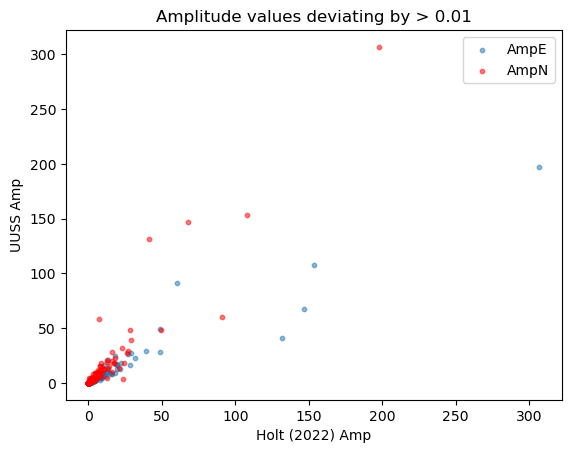

In [ ]:
plt.scatter(diff_ampE['AmpE_x'], diff_ampE['AmpE_y'], alpha=0.5, s=10, label='AmpE')
plt.scatter(diff_ampN['AmpN_x'], diff_ampN['AmpN_y'], alpha=0.5, s=10, color='r', label='AmpN')

plt.xlabel('Holt (2022) Amp')
plt.ylabel('UUSS Amp')
plt.title(f"Amplitude values deviating by > {amp_tol}")
plt.legend()

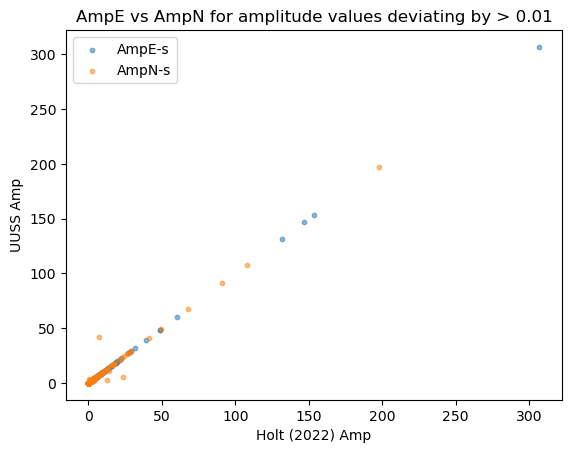

In [ ]:
plt.scatter(diff_ampE['AmpE_x'], diff_ampE['AmpN_y'], alpha=0.5, s=10, label='AmpE-s')
plt.scatter(diff_ampN['AmpN_x'], diff_ampN['AmpE_y'], alpha=0.5, s=10, label='AmpN-s')

plt.xlabel('Holt (2022) Amp')
plt.ylabel('UUSS Amp')
plt.title(f"AmpE vs AmpN for amplitude values deviating by > {amp_tol}")
plt.legend()

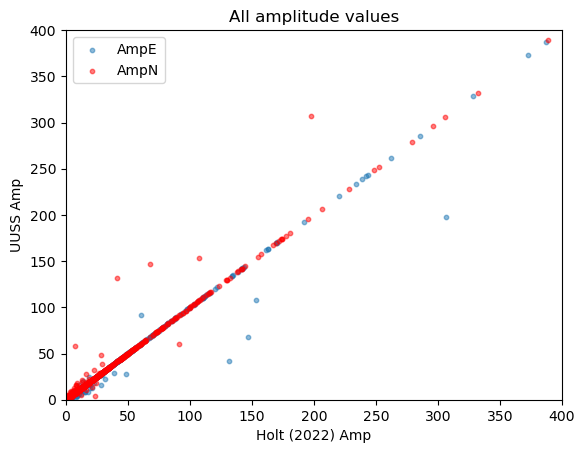

In [ ]:
plt.scatter(inner_merge['AmpE_x'], inner_merge['AmpE_y'], alpha=0.5, s=10, label='AmpE')
plt.scatter(inner_merge['AmpN_x'], inner_merge['AmpN_y'], alpha=0.5, s=10, color='r', label='AmpN')

plt.xlim([0, 400])
plt.ylim([0, 400])

plt.xlabel('Holt (2022) Amp')
plt.ylabel('UUSS Amp')
plt.title(f"All amplitude values")
plt.legend()

Average half amps are much closer... This is because the main reason for the amplitude differences are that they are assigned to the opposite channels. Likely borehole stations. 

In [ ]:
diff_halfAmp = inner_merge[abs(inner_merge['halfAmpH_x'] - inner_merge['halfAmpH_y']) > amp_tol]
print(f'There are {diff_halfAmp.shape[0]} halfAmpH values that deviate by > {amp_tol} units in the two catalogs. Occur at these stations...')
diff_halfAmp['Sta'].value_counts()

There are 20 halfAmpH values that deviate by > 0.01 units in the two catalogs. Occur at these stations...


Sta
YMR     6
YFT     5
YHB     5
LKWY    3
YNR     1
Name: count, dtype: int64

In [ ]:
diff_halfAmp[['AmpE_x', 'AmpN_x', 'halfAmpH_x', 'AmpE_y', 'AmpN_y','halfAmpH_y']]

,AmpE_x,AmpN_x,halfAmpH_x,AmpE_y,AmpN_y,halfAmpH_y
1112,1.397816,3.693860,1.272919,1.397816,1.929716,0.831883
1113,5.246729,23.567886,7.203654,5.246729,3.693860,2.235147
1114,10.487020,14.117985,6.151251,10.487020,15.591166,6.519547
1174,0.179695,0.165957,0.086413,0.179695,0.307944,0.121910
1175,1.164593,0.665891,0.457621,1.164593,1.796179,0.740193
1181,0.970253,0.447455,0.354427,0.970253,1.235565,0.551455
4989,0.840860,0.224133,0.266248,0.840860,1.092774,0.483409
5648,0.923520,1.264889,0.547102,0.923520,0.579274,0.375698
5649,1.150595,1.172030,0.580656,1.150595,1.264889,0.603871
5650,0.750487,0.860025,0.402628,0.750487,1.172030,0.480629


(0.0, 400.0)

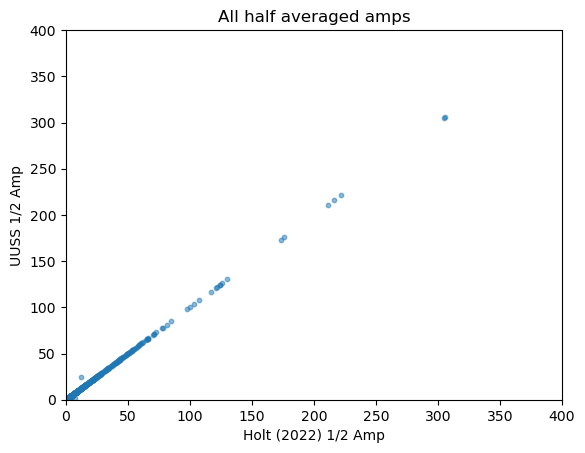

In [ ]:
plt.scatter(inner_merge['halfAmpH_x'], inner_merge['halfAmpH_y'], alpha=0.5, s=10)
plt.xlabel('Holt (2022) 1/2 Amp')
plt.ylabel('UUSS 1/2 Amp')
plt.title(f"All half averaged amps")
plt.xlim([0, 400])
plt.ylim([0, 400])


In [ ]:
dmin_tol = 0.5
print(f"{inner_merge[abs(inner_merge['Dmin_x'] - inner_merge['Dmin_y'] )> dmin_tol].drop_duplicates('Evid').shape[0]}/{inner_merge['Evid'].unique().shape[0]} events have Dmin differences > than {dmin_tol} km")

90/4660 events have Dmin differences > than 0.5 km


In [ ]:
assert np.array_equal(inner_merge['CatMag_x'], inner_merge["CatMag_y"]), 'Catalogs have different magnitude values'
assert np.allclose(inner_merge['EqDep_x'], inner_merge["EqDep_y"], rtol=1e-3), 'Catalogs have different depths'
assert np.allclose(inner_merge['EqLon_x'], inner_merge["EqLon_y"], rtol=1e-4), 'Catalogs have different lons'
assert np.allclose(inner_merge['EqLat_x'], inner_merge["EqLat_y"], rtol=1e-4), 'Catalogs have different lats'

In [ ]:
print("All large differences in Repi are at..")
inner_merge[inner_merge['Repi_x'] - inner_merge['Repi_y'] > 1][['Sta', 'Repi_x', "Repi_y"]].value_counts('Sta')

All large differences in Repi are at..


Sta
BOZ    91
Name: count, dtype: int64

In [ ]:
inner_merge[inner_merge['Repi_x'] - inner_merge['Repi_y'] > 1][['Sta', 'Repi_x', "Repi_y", 'SLat_x', 'SLat_y', 'SLon_x', 'SLon_y']]

,Sta,Repi_x,Repi_y,SLat_x,SLat_y,SLon_x,SLon_y
29,BOZ,146.8,141.469245,45.59697,45.59697,-111.62967,-111.62967
57,BOZ,147.2,141.927210,45.59697,45.59697,-111.62967,-111.62967
63,BOZ,146.5,141.254338,45.59697,45.59697,-111.62967,-111.62967
72,BOZ,146.9,141.568475,45.59697,45.59697,-111.62967,-111.62967
125,BOZ,146.3,140.969317,45.59697,45.59697,-111.62967,-111.62967
...,...,...,...,...,...,...,...
2912,BOZ,104.4,99.525830,45.59697,45.59697,-111.62967,-111.62967
2950,BOZ,104.4,99.544823,45.59697,45.59697,-111.62967,-111.62967
3021,BOZ,103.1,98.252699,45.59697,45.59697,-111.62967,-111.62967
3076,BOZ,103.7,98.851556,45.59697,45.59697,-111.62967,-111.62967


In [ ]:
inner_merge['CatMagType'].value_counts()

CatMagType
l    14465
Name: count, dtype: int64

In [ ]:
np.where(np.isnan(inner_merge['SnrE_x']))

(array([], dtype=int64),)

In [ ]:
inner_merge[(np.isnan(inner_merge['SnrE_y'])) | (np.isnan(inner_merge['SnrN_y']))]

,Evid,Date,Time,EqLat_x,EqLon_x,EqDep_x,EqML,EqMC,N,Dmin_x,...,AmpN_y,UnN_y,PerN_y,SnrN_y,halfAmpH_y,CatMag_y,CatMagType,SourceE,SourceN,Dmin_y
418,60009035,2016-03-25,07:17:57.63,44.554,-110.969,10.28,1.78,-9.99,12,12.0,...,0.788747,mm,0.40,15.129239,0.408139,1.78,l,Jiggle,Jiggle,11.9
692,60014784,2018-02-18,04:47:55.51,44.740,-110.981,7.87,2.60,-9.99,15,3.0,...,3.346042,mm,0.24,NaN,1.279063,2.60,l,Jiggle,Jiggle,2.9
693,60014784,2018-02-18,04:47:55.51,44.740,-110.981,7.87,2.60,-9.99,15,3.0,...,3.798042,mm,0.54,NaN,2.232986,2.60,l,Jiggle,Jiggle,2.9
694,60014814,2018-02-18,09:23:59.47,44.736,-110.975,8.50,2.44,-9.99,21,4.0,...,2.274473,mm,0.24,NaN,0.870148,2.44,l,Jiggle,Jiggle,3.6
695,60014814,2018-02-18,09:23:59.47,44.736,-110.975,8.50,2.44,-9.99,21,4.0,...,2.749240,mm,0.24,NaN,1.573044,2.44,l,Jiggle,Jiggle,3.6
2829,60046047,2013-11-23,22:25:44.43,44.827,-111.015,12.60,2.12,-9.99,26,8.0,...,0.273314,mm,0.14,12.620424,0.164177,2.12,l,Jiggle,Jiggle,7.6


In [ ]:
ml_df_reformEN['CatMagType'].value_counts()

CatMagType
l    23614
d      594
h       53
w        6
Name: count, dtype: int64

In [ ]:
# There are some values with no SNR values, but I think I am going to leave these in 
ml_df_reformEN[(np.isnan(ml_df_reformEN['SnrE'])) | (np.isnan(ml_df_reformEN['SnrN']))][['CatMagType', 'SourceE', 'SourceN']].value_counts()

CatMagType  SourceE  SourceN
l           Jiggle   Jiggle     266
d           Jiggle   Jiggle      15
Name: count, dtype: int64

RT2 source

In [ ]:
ml_df_reformEN[['SourceE', 'SourceN']].value_counts()

SourceE  SourceN
Jiggle   Jiggle     23869
RT2      RT2          343
         Jiggle        31
Jiggle   RT2           24
Name: count, dtype: int64

In [ ]:
inner_merge[['SourceE', 'SourceN']].value_counts()

SourceE  SourceN
Jiggle   Jiggle     14395
RT2      Jiggle        29
         RT2           25
Jiggle   RT2           16
Name: count, dtype: int64

Holt (2022) have SNR values for picks that I think are from RT2 - have SNR 0 in my catalog 

In [ ]:
inner_merge[inner_merge['SourceE'] == 'RT2']['SnrE_x'].describe()

count    54.000000
mean      2.222058
std       0.862134
min       1.010000
25%       1.665000
50%       2.155000
75%       2.547500
max       6.932994
Name: SnrE_x, dtype: float64

In [ ]:
inner_merge[inner_merge['SourceN'] == 'RT2']['SnrN_x'].describe()

count    41.000000
mean      2.226804
std       1.019904
min       0.180000
25%       1.720000
50%       2.310000
75%       2.610000
max       7.058976
Name: SnrN_x, dtype: float64

In [ ]:
ml_df_reformEN[(ml_df_reformEN['SourceN'] == 'RT2')][['SnrN']].max()

SnrN    0.0
dtype: float64

In [ ]:
ml_df_reformEN[(ml_df_reformEN['SourceE'] == 'RT2')][['SnrE']].max()

SnrE    0.0
dtype: float64

# Save the reformatted yellowstone amplitude file

In [ ]:
#ml_df_reformEN.to_csv(f'{catalog_dir}/yellowstoneAmplitudesForJamesML_allPrefMagTypes_20121007_230103.csv', index=False)

In [ ]:
source_df = ml_df_reformEN.groupby('Evid')[['SourceE', 'SourceN']].value_counts().reset_index()
one_source_evs = source_df.drop_duplicates('Evid', keep=False)
one_source_evs[(one_source_evs['SourceE'] == 'RT2') & (one_source_evs['SourceN'] == 'RT2')].shape

(52, 4)

# Filter only local mag events

In [ ]:
ml_df_reformEN = ml_df_reformEN[ml_df_reformEN['CatMagType'] == 'l']
print(f"There are {ml_df_reformEN.shape[0]} amps for local mag events")

There are 23614 amps for local mag events


In [ ]:
#ml_df_reformEN.to_csv(f'{catalog_dir}/yellowstoneAmplitudesForJamesML_localMagnitudes_20121007_230103.csv', index=False)

In [ ]:
source_df = ml_df_reformEN.groupby('Evid')[['SourceE', 'SourceN']].value_counts().reset_index()
one_source_evs = source_df.drop_duplicates('Evid', keep=False)
one_source_evs[(one_source_evs['SourceE'] == 'RT2') & (one_source_evs['SourceN'] == 'RT2')].shape

(11, 4)

Apply Filters: <- Probably use James's code for this part
- Remove amps that are not on two channels
- Rhyp <= 180 km
- Remove picks with poorly constrained depths for Repi < 50 km
    - Repi < 1.4 focal depths or < 5 km
- Remove p-p amps that differ by > 4 std
- Event must have >= 2 stats


In [ ]:
ml_df_reformEN['Sta'].value_counts()

Sta
YNR     6176
YMR     5951
YFT     3523
YHB     3099
YUF     2042
LKWY    1723
BOZ      821
AHID     170
BW06     105
LOHW       4
Name: count, dtype: int64

In [ ]:
ml_df_reformEN[ml_df_reformEN['Rhyp'] > 100].Sta.value_counts()

Sta
BOZ     764
AHID    170
BW06    105
YHB       4
Name: count, dtype: int64

In [118]:
print('Event with only 1 sttation amp measurement')
ml_df_reformEN[ml_df_reformEN['Evid'] == ml_df_reformEN.drop_duplicates('Evid').iloc[np.where(ml_df_reformEN.groupby('Evid')['Sta'].count() < 2)]['Evid'].values[0]]

Event with only 1 sttation amp measurement


,Evid,Sta,Cmp,Net,ChanE,Loc,SMagTypeE,AmpE,UnE,SMLE,...,UnN,SMLN,SourceN,PerN,SnrN,EqDep,Repi,Rhyp,halfAmpH,Dmin
18475,60408292,LKWY,BH,US,BH1,00,l,0.119319,mm,1.06,...,mm,1.06,Jiggle,0.3,3.461973,7.59,28.85545,29.836975,0.079447,6.8
